# This is the coin flip problem, it is all over the book


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm

%matplotlib inline
sns.set(font_scale=1.5)

# Chaper 1
page 18

In [5]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
beta_params = [(1, 1), (0.5, 0.5), (20, 20)]

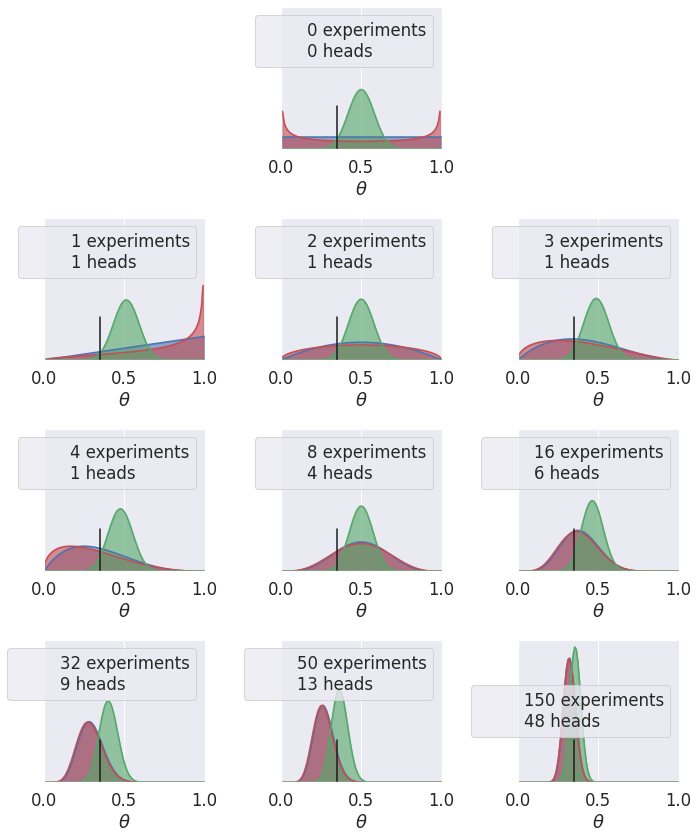

In [6]:
plt.figure(figsize=(10,12))

dist = stats.beta
x = np.linspace(0, 1, 100)
for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N,y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r'$\theta$')
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()

1. Blue is uniform prior
1. red has more 1, 0 than uniform
1. green is centered around 0.5, we think we know the answer

# Solve using a grid method
ch2 page 34

In [7]:
def posterior_grid(grid_points=100, heads=6, tosses=9):
    """
    A grid implementation for the coin-flip problem
    """
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1, grid_points)
    likelihood = stats.binom.pmf(heads, tosses, grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return grid, posterior

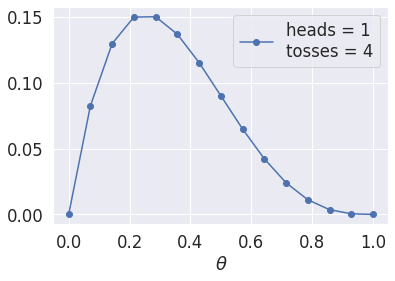

In [8]:
#Assuming we made 4 tosses and we observe only 1 head we have the following:
points = 15
h, n = 1, 4
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)

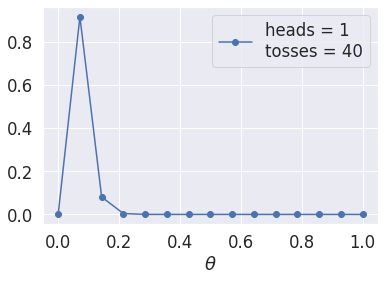

In [9]:
#Assuming we made 40 tosses and we observe only 1 head we have the following:
points = 15
h, n = 1, 40
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)

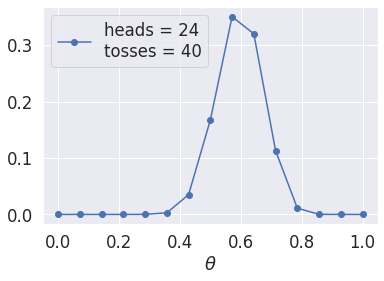

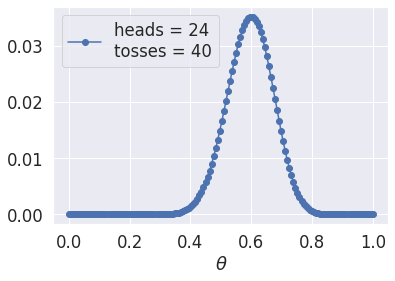

In [10]:
#Assuming we made 40 tosses and we observe 24 head we have the following:
points = 15
h, n = 24, 40
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)

plt.figure()
points = 150
h, n = 24, 40
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)


## Chapter 2
Coin flip pymc3

In [11]:
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


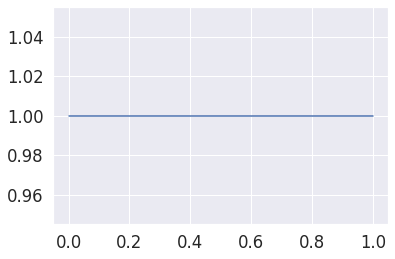

In [12]:
XX = np.linspace(0,1,100)
plt.plot(XX, stats.beta(1,1).pdf(XX))

In [27]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, start=start, chains=4, compute_convergence_checks=True)

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The number of effective samples is smaller than 25% for some parameters.


### Convergence checking
page 49

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/traceplot.py:212: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta'}
  warnings.warn(


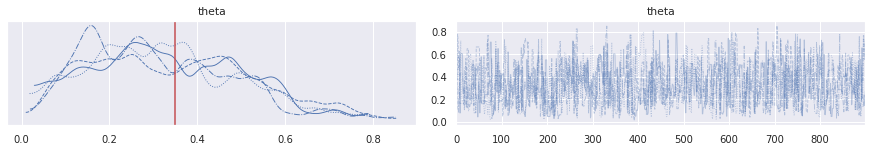

In [28]:
burnin = 100
chain = trace[burnin:]
ax = pm.traceplot(chain, lines={'theta':theta_real});
ax[0][0].axvline(theta_real, c='r')


In [29]:
theta_real

0.35

In [30]:
with our_first_model:
    print(pm.rhat(chain))   # want < 1.1

<xarray.Dataset>
Dimensions:  ()
Data variables:
    theta    float64 1.004


/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

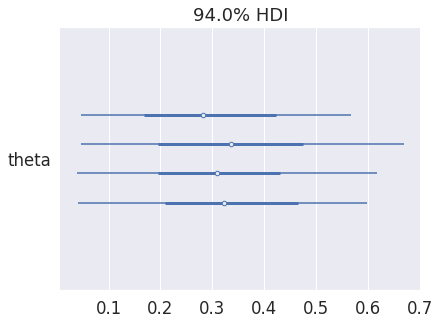

In [31]:
pm.forestplot(chain)

In [32]:
pm.summary(trace)

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.33,0.173,0.03,0.614,0.006,0.004,967.0,967.0,940.0,1153.0,1.0


/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'theta\n0'}>,
       <AxesSubplot:title={'center':'theta\n1'}>,
       <AxesSubplot:title={'center':'theta\n2'}>,
       <AxesSubplot:title={'center':'theta\n3'}>], dtype=object)

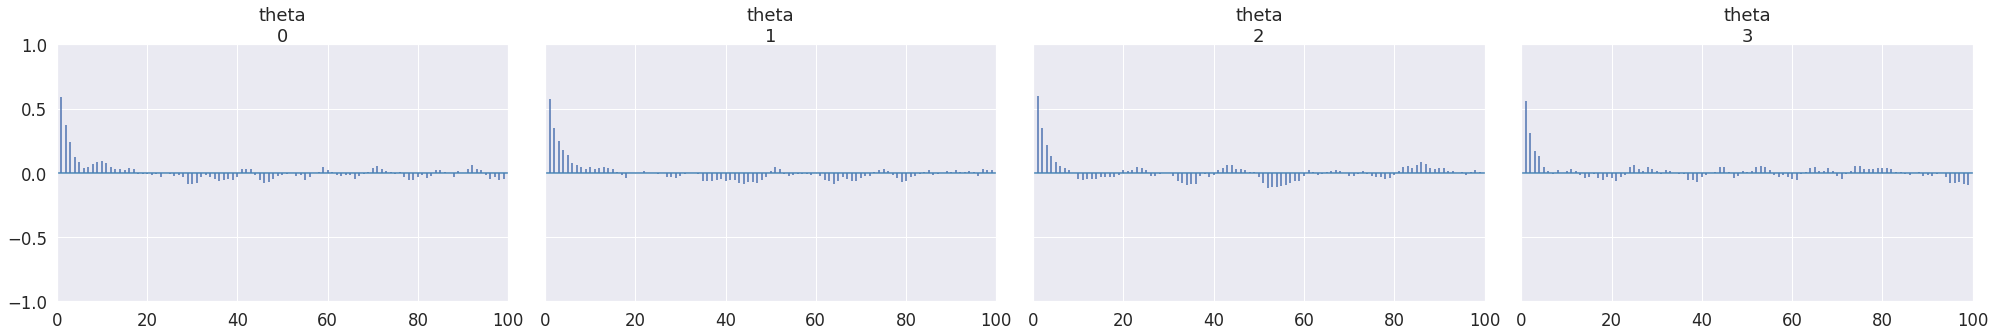

In [33]:
pm.autocorrplot(trace)

In [35]:
# a measure of eff n based on autocorrelecation
# pm.effective_n(trace)

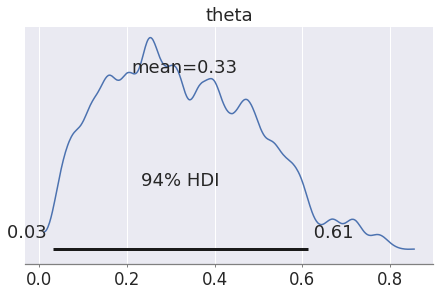

In [37]:
# AKA Kruschke plot
with our_first_model:
    pm.plot_posterior(trace)

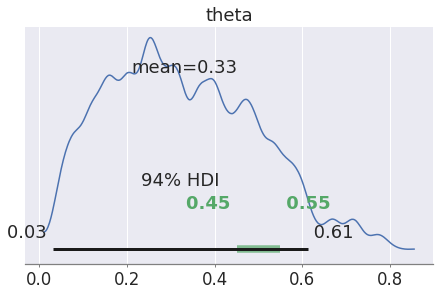

In [38]:
with our_first_model:
    pm.plot_posterior(trace, rope=[0.45, .55])

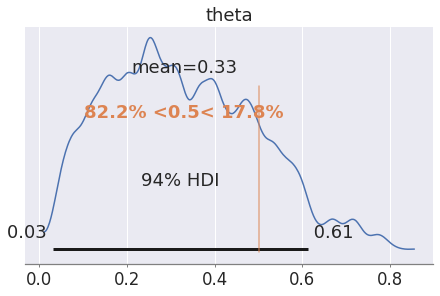

In [39]:
with our_first_model:
    pm.plot_posterior(trace, ref_val=0.50)

### Try pymc3 with a lot more data
Coin is clearly not fair at the 1000 flips level

In [40]:
data = stats.bernoulli.rvs(p=theta_real, size=1000) # 1000 flips in the data


In [41]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, start=start, chains=4)

INFO (theano.gof.compilelock): Waiting for existing lock by process '1905' (I am process '1512')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/balarsen/.theano/compiledir_Linux-4.4--Microsoft-x86_64-with-glibc2.10-x86_64-3.8.5-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '1905' (I am process '1512')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/balarsen/.theano/compiledir_Linux-4.4--Microsoft-x86_64-with-glibc2.10-x86_64-3.8.5-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '1905' (I am process '1512')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/balarsen/.theano/compiledir_Linux-4.4--Microsoft-x86_64-with-glibc2.10-x86_64-3.8.5-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '1905' (I am process '1512')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/balarsen/.theano/compiledir_

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 14 seconds.
The number of effective samples is smaller than 25% for some parameters.


/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/traceplot.py:212: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta'}
  warnings.warn(


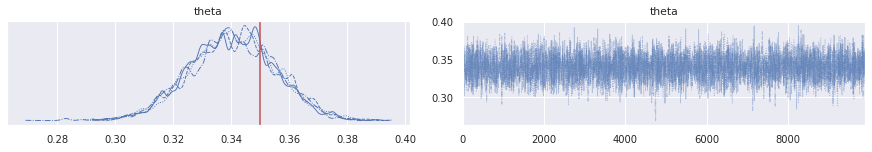

In [42]:
burnin = 100
chain = trace[burnin:]
ax = pm.traceplot(chain, lines={'theta':theta_real});
ax[0][0].axvline(theta_real, c='r')


In [43]:
pm.rhat(chain) # want < 1.1

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<xarray.Dataset>
Dimensions:  ()
Data variables:
    theta    float64 1.001

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

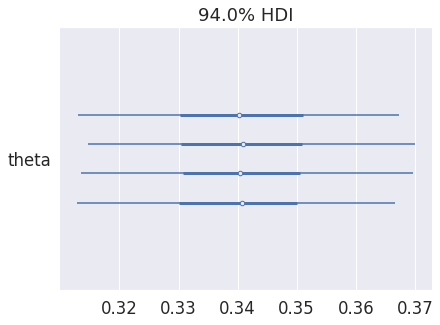

In [44]:
pm.forestplot(chain) # super tight range

In [45]:
pm.summary(trace)

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.34,0.015,0.314,0.369,0.0,0.0,5001.0,4999.0,5021.0,5319.0,1.0


/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'theta\n0'}>,
       <AxesSubplot:title={'center':'theta\n1'}>,
       <AxesSubplot:title={'center':'theta\n2'}>,
       <AxesSubplot:title={'center':'theta\n3'}>], dtype=object)

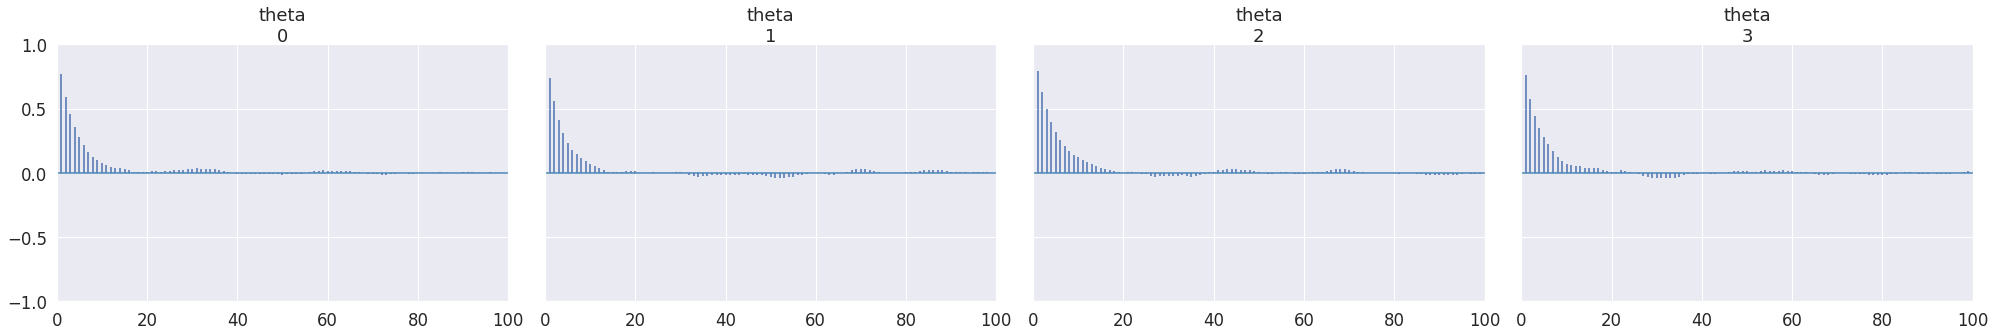

In [46]:
pm.autocorrplot(trace)

In [47]:
# pm.effective_n(trace)

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

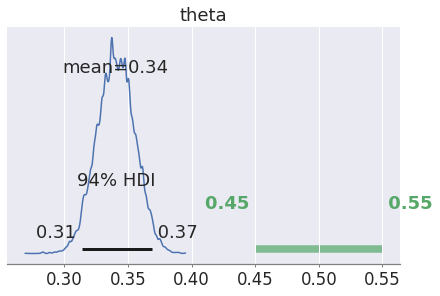

In [48]:
pm.plot_posterior(trace, rope=[0.45, .55])

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

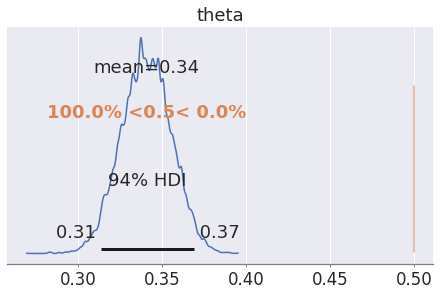

In [49]:
pm.plot_posterior(trace, ref_val=0.50)

### Try pymc3 with a lot more data
Coin is  not fair at the 25 flips level (for these data)

In [50]:
data = stats.bernoulli.rvs(p=theta_real, size=25) # 25 flips in the data


In [51]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, start=start, chains=4)

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 15 seconds.
The number of effective samples is smaller than 25% for some parameters.


/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/traceplot.py:212: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta'}
  warnings.warn(


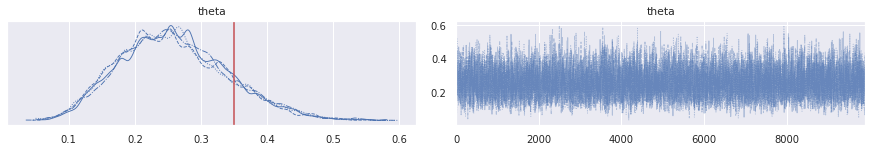

In [52]:
burnin = 100
chain = trace[burnin:]
ax = pm.traceplot(chain, lines={'theta':theta_real});
ax[0][0].axvline(theta_real, c='r')


In [54]:
pm.rhat(chain) # want < 1.1

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<xarray.Dataset>
Dimensions:  ()
Data variables:
    theta    float64 1.001

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

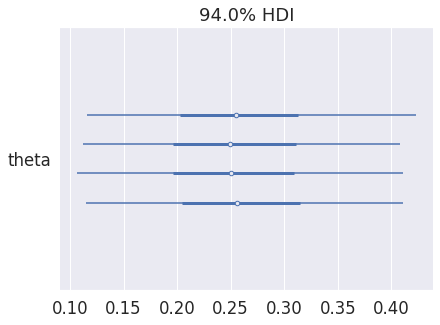

In [55]:
pm.forestplot(chain) # super tight range

In [56]:
pm.summary(trace)

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.259,0.082,0.109,0.411,0.001,0.001,8870.0,8870.0,8708.0,9521.0,1.0


/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'theta\n0'}>,
       <AxesSubplot:title={'center':'theta\n1'}>,
       <AxesSubplot:title={'center':'theta\n2'}>,
       <AxesSubplot:title={'center':'theta\n3'}>], dtype=object)

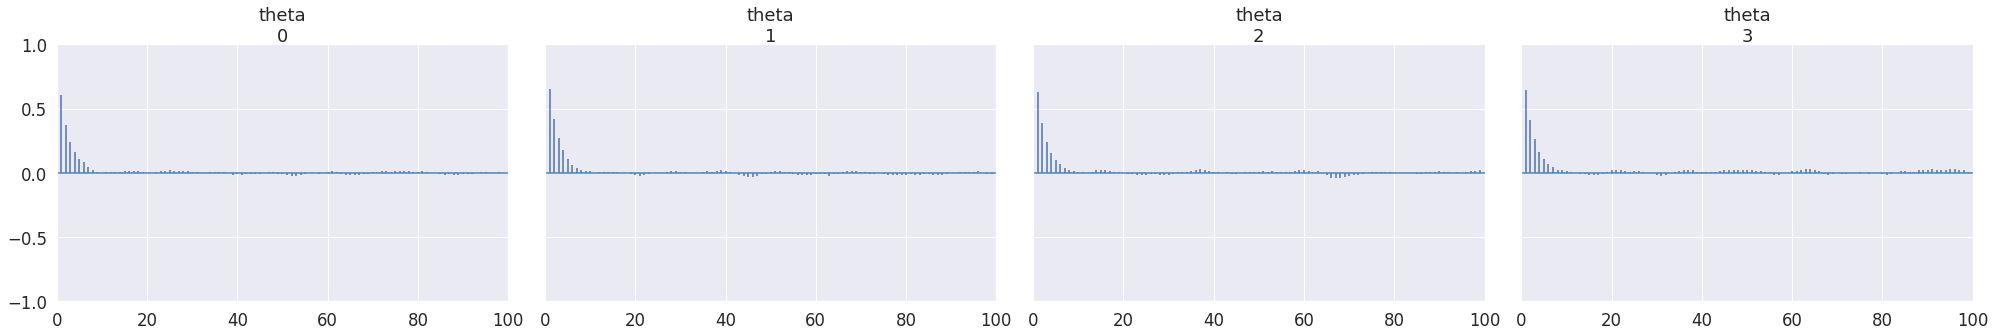

In [57]:
pm.autocorrplot(trace)

In [58]:
pm.effective_n(trace)

AttributeError: module 'pymc3' has no attribute 'effective_n'

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

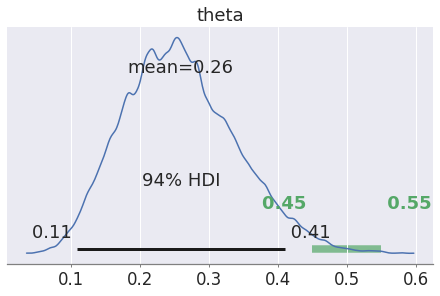

In [59]:
pm.plot_posterior(trace, rope=[0.45, .55])

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

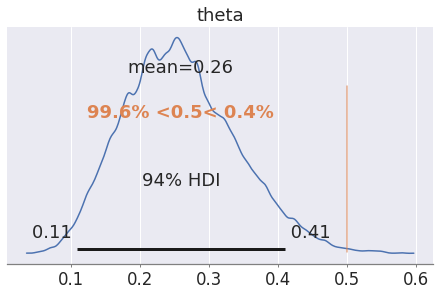

In [60]:
pm.plot_posterior(trace, ref_val=0.50)

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

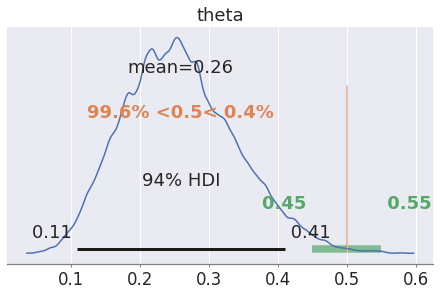

In [61]:
pm.plot_posterior(trace, ref_val=0.50, rope=[0.45, .55])

# Explore priors on the coin flip
Ex 2-5 page 59

In [62]:
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (8 chains in 4 jobs)
Metropolis: [theta]


Sampling 8 chains for 1_000 tune and 5_000 draw iterations (8_000 + 40_000 draws total) took 15 seconds.
The number of effective samples is smaller than 25% for some parameters.
/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, "pm.Beta('theta', alpha=1, beta=1)")

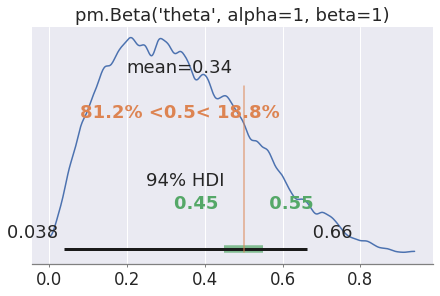

In [63]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step, start=start, chains=8)
pm.plot_posterior(trace, ref_val=0.50, rope=[0.45, .55])
plt.title("pm.Beta('theta', alpha=1, beta=1)")

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (8 chains in 4 jobs)
Metropolis: [theta]


Sampling 8 chains for 1_000 tune and 5_000 draw iterations (8_000 + 40_000 draws total) took 22 seconds.
The number of effective samples is smaller than 25% for some parameters.
/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, "pm.Uniform('theta', 0, 1)")

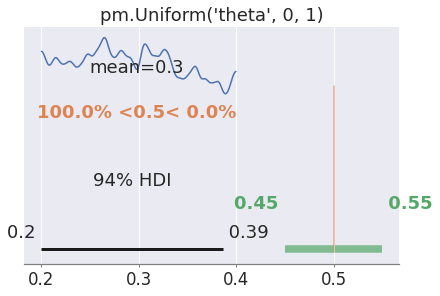

In [64]:
with pm.Model() as our_first_model:
    theta = pm.Uniform('theta', .2, .4)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step, chains=8)
pm.plot_posterior(trace, ref_val=0.50, rope=[0.45, .55])
plt.title("pm.Uniform('theta', 0, 1)")

In [ ]:
with pm.Model() as our_first_model:
    theta = pm.Normal('theta', 0.35, 1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step, chains=8)
pm.plot_posterior(trace, ref_val=0.50, rope=[0.45, .55])
plt.title("pm.Normal('theta', 0.35, 1)")

/home/balarsen/miniconda3/envs/python3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (8 chains in 4 jobs)
Metropolis: [theta]


In [ ]:
pm.plots.densityplot(trace, hpd_markers='v')